In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as pltp

In [47]:
# Number of Spatial Node
#N = 26
N = 251
L = 0.2
z_dom = np.linspace(0,L,N)

# Discretization matrix d & dd
# d = ?
h_arr = (z_dom[1]-z_dom[0])*np.ones([N,])
d_arr = 1/h_arr
#d_upp = np.diag(d_arr[:-1],1)
d_mid = np.diag(d_arr,0)
d_low = np.diag(d_arr[:-1], -1)
d = d_mid - d_low
d[0,:] = 0
#print(d)

# dd = ?
dd_arr = 1/h_arr**2
dd_upp = np.diag(dd_arr[:-1],1)
dd_mid = np.diag(dd_arr,0)
dd_low = np.diag(dd_arr[:-1],-1)
dd = dd_upp -2*dd_mid + dd_low
dd[0,:] = 0
dd[-1,:] = 0
#print(dd)

In [50]:
# Additional parameters
D_AB = 1E-6
h = h_arr[0]
C_end = 1
# PDE -> ODE model
def model_diff(y,t):
    C= y[:N]
    #dC = d@C
    ddC = dd@C
    # Boundary conditions
    dCdt = D_AB*ddC
    dCdt[0] = D_AB/h**2*C[1] - 2*D_AB/h**2*C[0] + D_AB/h**2*C_end
    dCdt[-1] = D_AB*(C[-2]-C[-1])/h**2
    dydt = dCdt
    return dydt    

In [57]:
# Time domain
t_ran = np.arange(0,10000+1,1)
#print(t_ran)
y0 = np.zeros([N,])
#print(C0.shape)
y_res = odeint(model_diff, y0, t_ran)
print(y_res.shape)

(10001, 251)


(251,)


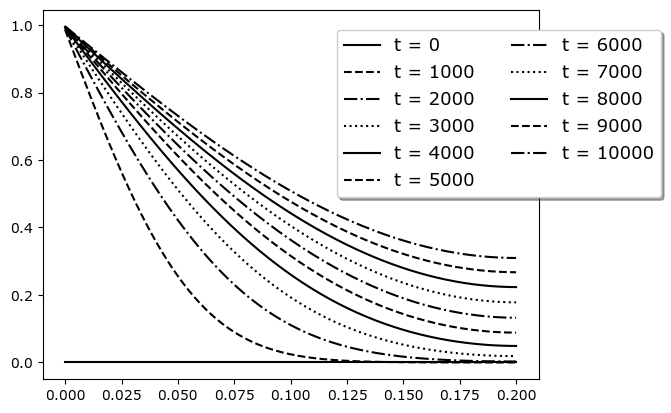

In [78]:
t_sample = t_ran[::1000]
ii_ran = np.arange(len(t_ran))[::1000]
#print(ii_ran)
#print(C_samp.shape)
print(C_samp.shape)
ls_list = ['-','--','-.',':']
cc = 0
for ii, tt in zip(ii_ran, t_sample):
    C_samp = y_res[ii, :]
    plt.plot(z_dom, C_samp, 'k',
             linestyle = ls_list[cc%len(ls_list)],
             label = f't = {tt}')
    cc +=1
    
plt.legend(fontsize = 13, fancybox = True, shadow = True, ncol=2,
          loc = 'upper center', bbox_to_anchor=(0.92,0.97))
